In [8]:
# https://www.swharden.com/wp/2010-03-05-realtime-fft-graph-of-audio-wav-file-or-microphone-input-with-python-scipy-and-wckgraph/
import pyaudio

CHUNK = 2**11
RATE = 44100

p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK)

for i in range(int(100*44100/44100)): #go for a few seconds
    data_ = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    peak=np.average(np.abs(data_))*2
    bars="#"*int(50*peak/2**16)
    print("%04d %05d %s"%(i,peak,bars))

stream.stop_stream()
stream.close()
p.terminate()

0000 01225 
0001 00430 
0002 00800 
0003 00833 
0004 00825 
0005 00835 
0006 00365 
0007 00472 
0008 00475 
0009 00622 
0010 00604 
0011 00451 
0012 00304 
0013 00133 
0014 00032 
0015 00024 
0016 00020 
0017 00019 
0018 00019 
0019 00017 
0020 00014 
0021 00013 
0022 00013 
0023 00011 
0024 00011 
0025 00009 
0026 00009 
0027 00024 
0028 00017 
0029 00012 
0030 00012 
0031 00029 
0032 05583 ####
0033 01416 #
0034 00414 
0035 02304 #
0036 04126 ###
0037 01131 
0038 00368 
0039 04070 ###
0040 01430 #
0041 00416 
0042 03106 ##
0043 06519 ####
0044 01646 #
0045 00573 
0046 05769 ####
0047 01531 #
0048 00466 
0049 07171 #####
0050 05108 ###
0051 01531 #
0052 00633 
0053 00917 
0054 01123 
0055 01068 
0056 00789 
0057 00578 
0058 00310 
0059 00108 
0060 00069 
0061 00219 
0062 00125 
0063 00143 
0064 00048 
0065 00051 
0066 00048 
0067 00015 
0068 00011 
0069 00010 
0070 00010 
0071 00010 
0072 00007 
0073 00024 
0074 00062 
0075 00011 
0076 00010 
0077 00008 
0078 00189 
0079 00353 
0080 0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib inline
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

    
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

display(HTML(anim.to_html5_video()))
plt.clf()
plt.show()

<IPython.core.display.Javascript object>


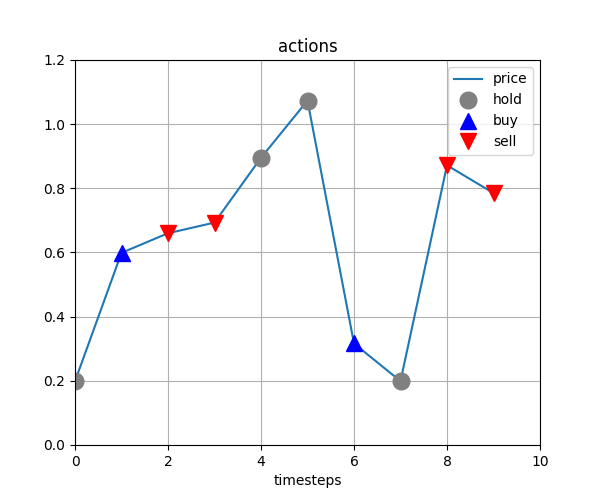

In [7]:
class LivePlotNotebook(object):
    def __init__(self):
        %matplotlib notebook
        fig,ax = plt.subplots(1,1,figsize=(6,5))
        
        ax.plot([0]*20, label='price')
        ax.plot([1]*20, [1]*20, 'o', ms=12,c='gray', label='hold')
        ax.plot([0]*20, [0]*20, '^', ms=12,c='blue', label='buy' )
        ax.plot([0]*20, [0]*20, 'v', ms=12,c='red', label='sell')
        
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.legend()
        ax.set_xlabel('timesteps')
        ax.grid()
        ax.set_title('actions')
        ax.set_xlim([0,10])
        ax.set_ylim([0,1.2])        
        self.ax = ax
        self.fig = fig

    def update(self, x, actions):
        # update price
        line = self.ax.lines[0]
        line.set_xdata(range(len(x)))
        line.set_ydata(x)
        
        # update action plots
        for i, line in enumerate(self.ax.lines[1:]):
            line.set_xdata(np.argwhere(actions==i).T)
            line.set_ydata(x[actions==i])
            line.set_marker(['o','^','v'][i])

        # update limits
#         self.ax.set_xlim(0, len(actions))
#         self.ax.set_ylim(x.min(), x.max())

        self.fig.canvas.draw()
        
# Test
import time
liveplot = LivePlotNotebook()
x=np.random.random((10,))
for i in range(50):
    time.sleep(.01)
    liveplot.update(
        x=x+np.random.random(x.shape)/10,
        actions=np.random.randint(0, 3, size=(10,))
    )